<center>
    <div style="font-size: 24px; font-weight: 500; margin-bottom: -10px">
        Climat et Changement Climatique
    </div>
    <h3>Master</h3>
    <h5 style="margin-top: -5px">Sciences de l’Océan, de l’Atmosphère et du Climat</h5>
    <h1>TP - Carbon Cycle and forcings on 20e-century</h1>
    <h2>Part II: Analysis of IPCC/CMIP5 model results</h2>
</center>


## 1. Introduction

In this part, we analyse the impulsional response of several climate variables as simulated by various state-of-the-art Earth system models. For your information, these models have contributed to the fifth Intercomparison project (CMIP5), which has provided simulation results for the fifth IPCC assement report [IPCC, 2013](https://www.ipcc.ch/assessment-report/ar5/).

<div align="center"><img src="./figures/GCP2017.png" alt="drawing" width="600"/></div>


Along this notebook, Python codes are used to analyse model outputs.
You first need to import and load required modules:  

In [2]:
# header: importing useful modules and functions
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import fmin

## 2. Climate sensitivity at the equilibrium (ECS)

The Equilibrium Climate Sensitivity (ECS), is a key metric used in climate science to describe how much climate change we have for a doubling of atmospheric carbon dioxide concentration. It helps infering the extent and magnitude of climate change and is useful in comparing the size of response by different models and to different forcings (greenhouse gases, aerosols, solar variability, etc.). A radiative forcing applied to the climate system must result in a climate change which tends to counteract the forcing; otherwise the system would be unstable. The climate sensitivity measures the size of the global average surface air temperature response.

In the [IPCC](https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_AnnexVII.pdf), the ECS is defined as the _"the equilibrium (steady state) change in the surface temperature following a doubling of the atmospheric carbon dioxide (CO$_2$) concentration from pre-industrial conditions"_.
Therefore the ECS is a measure of the Earth surface temperature change $(\Delta T)$ in response to a change of atmospheric CO$_2$ concentration.
While it is commonly defined by doubling the CO$_2$ concentration, here we propose to apply this concept to 4xCO2 simulations.

The Earth climate response to this external forcings (changing in greenhouse gases concentration) can be inferred from the linearised radiative budget:
$$ \Delta R = F - \lambda \Delta T$$
where $\Delta R$ is the net resulting flux (taken here at the top of the atmosphere) and $F$ are perturbations from the energy budget at the equilibrium, called _external forcings_. 

Therefore, the new equilibrium (the ECS) is reached when $\Delta R = 0$, leading to:
$$ \left(\Delta T\right)_\text{eq} = F / |\lambda|$$

Here, $\lambda$ is the climate sensitivity parameter ($<0$) and indicates the strength of the climate system’s net feedback. It can be computed from a the new equilibrium $\lambda = -F / \left(\Delta T\right)_\text{eq}$ or by linear regression of the function $\Delta R = f(\Delta T)$.

### 2.1 CMIP5 multi-model analysis

The code below loads results from a preindustrial control simulation (1850 cycling over years), so-called _ctrl_, and a 4×CO$_2$ control simulation, so-called _quad_, for the following set of climate variables :
* __tas__  : temperature air surface
* __rsdt__ : radiation shortwave downward top-of-the-atmosphere
* __rlut__ : radiation longwave upward top-of-the-atmosphere
* __rsut__ : radiation shortwave upward top-of-the-atmosphere

These climate variables have been globally averaged. The original data can be found on
international data node like http://cmip-pcmdi.llnl.gov/cmip5/data_portal.html.

In [3]:
# ancillary lists for loading data
model_list = ["ACCESS-10","ACCESS-13","BCC-CSM-11",\
    "BCC-CSM-11m","CanESM2","CCSM4","CNRM-CM5",\
    "CNRM-CM5-2","CSIRO-Mk360","GFDL-CM3","GFDL-ESM2G",\
    "GFDL-ESM2M","GISS-E2-H","GISS-E2-R",\
    "HadGEM2-ES","IPSL-CM5A-LR","IPSL-CM5A-MR",\
    "IPSL-CM5B-LR","MIROC5","MIROC-ESM","MPI-ESM-LR",\
    "MPI-ESM-MR","MPI-ESM-P","MRI-CGCM3","NorESM1-M"]
model_length = {"ACCESS-10":150,"ACCESS-13":151,"BCC-CSM-11":150,\
    "BCC-CSM-11m":150,"CanESM2":150,\
    "CCSM4":151,"CNRM-CM5":150,"CNRM-CM5-2":140,\
    "CSIRO-Mk360":150,"GFDL-CM3":150,"GFDL-ESM2G":300,\
    "GFDL-ESM2M":300,"GISS-E2-H":151,"GISS-E2-R":151,\
    "HadGEM2-ES":151,"IPSL-CM5A-LR":260,\
    "IPSL-CM5A-MR":140,"IPSL-CM5B-LR":160,"MIROC5":151,\
    "MIROC-ESM":150,"MPI-ESM-LR":150,"MPI-ESM-MR":150,\
    "MPI-ESM-P":150,"MRI-CGCM3":150,"NorESM1-M":150}
    
# create array of final variables -- tas in {degC}; rsdt,rlut,rsut in {W/m2}
for var in ["tas","rsdt","rsut","rlut"]:
    exec(var+"_ctrl = np.zeros((300,len(model_list)),) * np.nan")
    exec(var+"_quad = np.zeros((300,len(model_list)),) * np.nan")

# load pre-processed CMIP5 results
for mod in model_list:
    for sim in ['ctrl','quad']:
        TMP = np.array([line for line in csv.reader(open('data/Climate_CMIP5/Climate_'+mod+'.'+sim+'_global.csv','r'))][1:], 
                       dtype=float)
        lgd = [line for line in csv.reader(open('data/Climate_CMIP5/Climate_'+mod+'.'+sim+'_global.csv','r'))][0]
        for var in ['tas','rsdt','rsut','rlut']:
            exec(var+'_'+sim+'[:len(TMP),model_list.index(mod)] = TMP[:,lgd.index(var)]')

#### Question 1:

* _Recall the Earth radiation budget in the atmosphere (see lecture 4/10)_
* _Explain what piControl and 4xCO2 simulations are ? What are they used for ?_

__Help__: you can insert image using html code:
```html
<img src="image.png" alt="drawing" width="600"/>
```

<font color="blue">

The Earth radiation budget can be written: $\Delta R = \left(1-\alpha\right)S_0/4 - \sigma T_e^4 + \mathrm{F} = 0 \,$ (perturbations $\text{F}$ of this budget are called _external forcings_).
<img src="./figures/Simplified_Energy_Balance_Model.png" alt="drawing" width="600"/>

- *piControl* stands for "pre-industrial control";
- *4xCO2* are simulations that are branched in January of the CO2-concentration driven by piControl runs and abruptly quadruple the atmospheric CO2 concentration. This concentration is then fixed during the simulation.
  
In 4xCO2 simulations, as the system subsequently evolves toward a new equilibrium, the imbalance in the net flux ($\Delta R$) at the top of the atmosphere can be plotted against global temperature change ($\Delta T$). It is then possible to diagnose both the effective radiative forcing due to a quadrupling of CO2 ($F_{4\times\text{CO}_2}$) and also effective equilibrium climate sensitivity (ECS).
Moreover, by examining how individual flux components evolve with surface temperature change, one can learn about the relative strengths of different feedbacks. 

</font>

#### Question 2:

* _For all models, present on one figures (with 4 subplots) the time series of 'tas' and 'rsut', 'rlut', 'rsdt' as anomalies of 4xCO2 compared to the ctrl simulation._

__Help__: The code can start with the following commands :
```python
# plot temperature and radiative budget
plt.figure()
plt.subplot(4,1,1)
for mod in model_list:
    m = model_list.index(mod)
```

Text(0.5, 0.91, 'CMIP5 model anamolies (4xCO2 - piCtrl)')

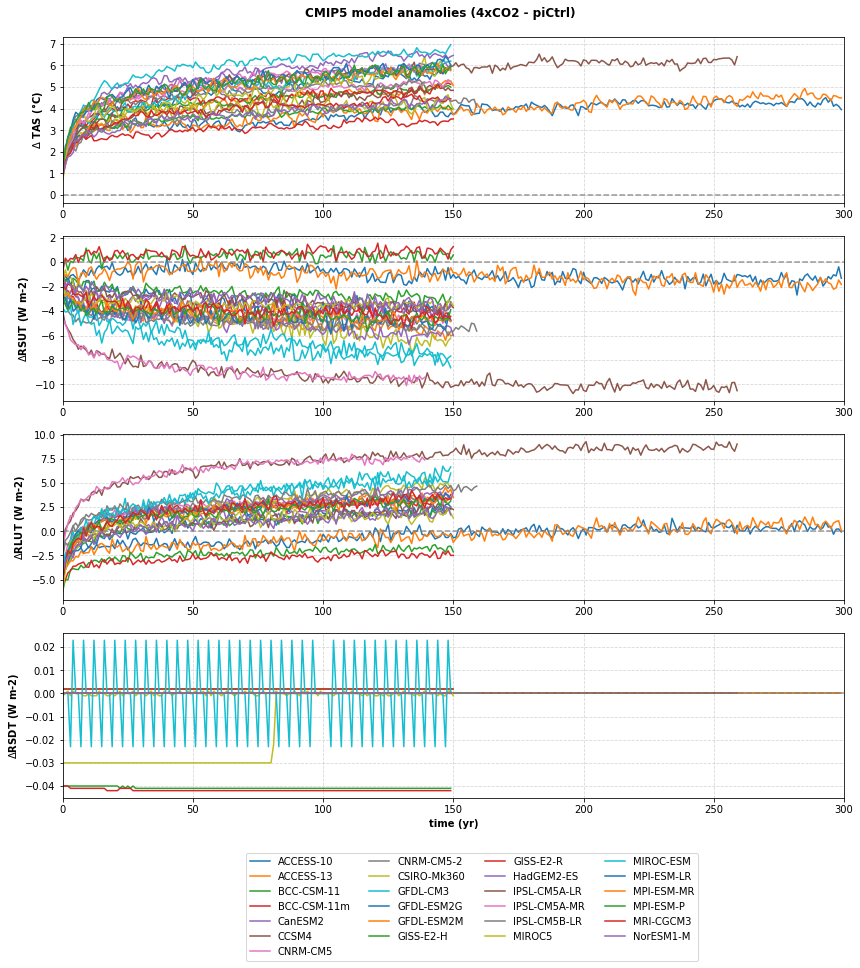

In [4]:
# tas
fig, ax = plt.subplots(4,1, figsize=(14,14))
for mod in model_list:
    m = model_list.index(mod)
    ax[0].plot((tas_quad-tas_ctrl)[:,m])
    ax[0].set_ylabel(r'$\Delta$ TAS (°C)', fontweight="bold")

# rsut
for mod in model_list:
    m = model_list.index(mod)
    ax[1].plot((rsut_quad-rsut_ctrl)[:,m])
    ax[1].set_ylabel(r'$\Delta$RSUT (W m-2)', fontweight="bold")

# rlut
for mod in model_list:
    m = model_list.index(mod)
    ax[2].plot((rlut_quad-rlut_ctrl)[:,m])
    ax[2].set_ylabel(r'$\Delta$RLUT (W m-2)', fontweight="bold")

# rsdt
for mod in model_list:
    m = model_list.index(mod)
    ax[3].plot((rsdt_quad-rsdt_ctrl)[:,m])
    ax[3].set_xlabel('time (yr)', fontweight="bold")
    ax[3].set_ylabel(r'$\Delta$RSDT (W m-2)', fontweight="bold")
ax[3].legend(np.array(model_list), ncol=4, bbox_to_anchor=(1.32,- 0.8, -0.5, 0.5))

for axis in ax :
    axis.hlines(0,0,300, color="grey", ls="--", alpha=0.8)
    axis.set_xlim([0,300])
    axis.grid("on", alpha=0.5, ls="--")
    
fig.suptitle("CMIP5 model anamolies (4xCO2 - piCtrl)", fontweight="bold", y=0.91)

* _What do you see ? Did you expect this result ? Why ?_

<font color="blue">

Many comments can arise from this figure, among others :

- Multi model comparison exhibits **large ensemble ranges** (e.g. from approx. +3.5°C to + 6.5°C after 150 years).

  - _Is these differences are problematic ?_\
    Not necessary. We can remark that they give similar trends (global surface temperature increase, as well as upward longwave radiation). This is rather reassuring in the sense that we can trust their results in broad terms. CMIP results feed the IPCC Assessment Reports in which confidence levels on climate metrics are given from that model results match or not.

  - _Which model is the best ?_\
    Probably none. Models are often run on historical period (1950-today) and compared to observations. However, the answer will be different depending on the metric considered to evaluate the model. Indeed, no model performs well everywhere. Regarding future climate projection, it is often admit that the multi model mean gives the best estimate while the standard deviation gives the uncertainty.
 
  - _What differ between the models ?_\
    They are all based on physical equations (transport and conservation equations) but different numerical choices (how to solve the equation) and different modelling choices (how to represent processes) are made. In particular, climate models cannot fully resolve small-scale processes, such as those related to clouds – which are thought to be important for climate sensitivity.

- **The surface temperature (tas) increases in the 4xCO2 experiment** (and this is robust in all models)

  - This was expected due to our understanding on how the system responds to increasing greenhouse gases in the atmosphere.
    
  - _How does this work ?_ \
    The absorptivity of the atmosphere is close to 1, i.e., almost all surface radiation is absorbed. Increasing the amount of greenhouse gases therefore has only a relatively marginal effect on absorptivity: it is only increased at wavelengths where opacity is not already total. However, the addition of greenhouse gases have an impact on the amount of radiation emitted at the top of the atmosphere ($\sigma T_e^4$). Due to the negative temperature gradient in the troposphere, an increase of CO$_2$ leads to a reduction of $T_e$ (the atmosphere layer that emit longwave is higher in altitude). This results in a gain of energy in the climate system warming the troposphere where the temperature gradient is shifted to reach a new equilibrium (leading to an increase of the surface temperature). Quantifying this increase in surface temperature is related to the ECS metric.

- **The shortwave reflection (rsut) is overall reduced** (but there are large differencies between models, two of them even simulate a slight increase) 

  - *Why is shortwave reflection reduced under 4xCO2 compared to control? (ie. Why is ΔRSUT <0 ?)*\
    A potential explanation could be snow and ice melting due to the surface warming. This changes the Earth surface temperature leading to a decrease of the Earth's albedo ($\alpha$). As a consequence, more solar radiation is absorbed leading to further warming of the surface temperature. This illustrates a _positive feedback_ (CO$_2$ forcings $F \Rightarrow \Delta T \uparrow \Rightarrow \alpha\downarrow \Rightarrow \Delta T \uparrow$)
      
  - *Why models are so different ?*\
    Around 20\% of the incoming shortwave is reflected by cloulds. Therefore, RSUT is sensitive to cloud formation and model parameters such as the atmosphere resolution, the convection scheme. With a warmer climate (such as in 4xCO2 runs), one can expect more evaporation and more water vapor (due to the increase of the saturation vapor pressure) leading to more cloud formation and an increase of cloud albedo.\
    Another cause can be the way how sea and ice are modelled. It is important to recall here that glacier and sea-ice are poorly understood and observed (they are formed in harsh environments such as polar regions and mountains). This results in large uncertainty in ice parameters (e.g. some models consider constant ice or snow thermal conductivity) which can lead to different changes in surface albedo.   
 
    It is important to note that these hypotheses are only speculative and a detailed analysis of individual model are necessary to uderstand what really cause changes in RSUT variable. For instance, it is interesting to note that the two GFDL-ESM models only simulate a slow and small decrease in shortwave reflection while GISS-E2 models even show an slight increase.   
      
- When CO$_2$ concentration is quadruple, **longwave radiation (rlut) at the top-of-atmosphere is immediately reduced (~3 W/m2) and then increases** during the simulation with a shape similar to that of temperature (tas). In most models, RLUT becomes larger in 4xC02 than in pre-inductrial climate after tens of years.  
   
  - This behaviour was expected as discussed in the temperature (tas) figure. Indeed, changes in the atmosphere composition lead to a higher emission altitude, which combined with the negative temperature gradient in the troposphere, reduce the temperature of emission $T_e$. Then the troposphere adjust its temperature to a new equilibrium, increasing the temperature profile in all the troposphere.
    This illustrates a transitory behaviour of the system which tends to reach a new equilibrium.
    
  - Interestingly, GFDL-ESM and GISS-E2 models, which have different behaviour in shortwave reflection, require more time to have $\Delta$RLUT>0 (in the later, it is not reached at the end of the 4xCO2 simultation, even after 150 years)
        
- **The shortwave incoming radiation (rsdt) is almost the same after quadrupling CO$_2$ concentration.** Indeed, $\Delta$RSDT is at least 2 order of magnitude smaller than the other flux.

  - _Why is RSDT constant between simulations ?_\
    The incoming shortwave radiation (at the top of the atmosphere) is directly related to the solar irradiance and thus to the solar constant $S_0$. Its amplitude is mostly related to sun activity and to the Earth orbit (to the Sun-Earth distance and angle). Increasing the greenhouse concentration in the atmophere has no impact on this, and thus remains constant between pre-industrial and 4xCO2 climates.  

  - _But why are some model showing differences ?_\
    Some model take into account variation in solar irradiance, which is known (and observed) to change and to cycle with at different periods (the name of _"solar constant"_ for $S_0$ is thus not appropriate). For instance, in [MIROC-ESM](https://gmd.copernicus.org/articles/4/845/2011/gmd-4-845-2011.html) _"spectral changes in solar irradiance are considered"_ and _"show impact on the total ozone"_ (in the stratosphere). However, this cycle remains the same when the CO$_2$ is quadrupled and the differences plotted here are only due to the fact that these cycles are not perfectly aligned in ctrl and 4xC02 runs (indeed, the abrupt 4xCO2 is started from the end of the pre-industrial simulation, likely at the midle of a solar forcing cycle). 

</font>

#### Question 3:

* *How the net radiative budget is impacted by an increase of the atmospheric CO$_2$ concentration ? What is the corresponding variable ?*

__Helps__: think about the Earth energy budget (Question 2)

Text(0.5, 0.91, 'Warming and radiative imbalance')

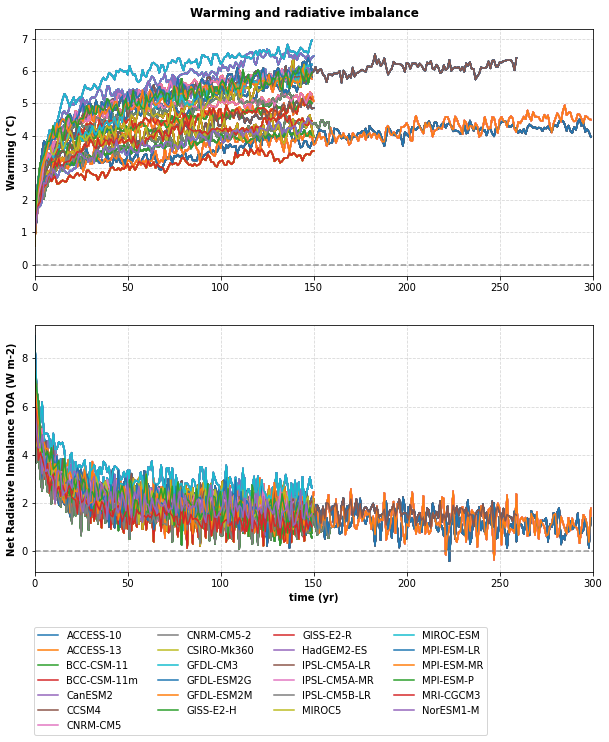

In [5]:
# create net radiative budget variable
netrad_ctrl = rsdt_ctrl - rsut_ctrl - rlut_ctrl
netrad_quad = rsdt_quad - rsut_quad - rlut_quad

# Compute Radiative Imbalance and Warming
netImbalance = netrad_quad - netrad_ctrl
Warming      = tas_quad - tas_ctrl

# NET IMBALANCE vs TEMPERATURE
fig, ax = plt.subplots(2,1, figsize=(10,10))

for mod in model_list:
    m = model_list.index(mod)
    ax[0].plot(Warming[:])
    ax[0].set_ylabel('Warming (°C)', fontweight="bold")
    
for mod in model_list:
    m = model_list.index(mod)
    ax[1].plot(netImbalance[:])
    ax[1].set_xlabel('time (yr)', fontweight="bold")
    ax[1].set_ylabel('Net Radiative Imbalance TOA (W m-2)', fontweight="bold")
ax[1].legend(np.array(model_list), ncol=4, bbox_to_anchor=(1.32,- 0.7, -0.5, 0.5))

for axis in ax :
    axis.hlines(0,0,300, color="grey", ls="--", alpha=0.8)
    axis.set_xlim([0,300])
    axis.grid("on", alpha=0.5, ls="--")
    
fig.suptitle("Warming and radiative imbalance", fontweight="bold", y=0.91)

* _Can we consider that the system is in an equilibrium state after 100 years ? Why ?_

<font color="blue">

No, they still have a net positive radiative imbalance !
  
The figure seems to indicate a link between the degree of warming and the net radiative imbalance. Indeed the warmest model in cyan is also the most imbalanced one. Same for the red curves that have lower net radiative imbalance and are generally cooler.

However radiative imbalances are somewhat similar between models but warmings are not indicating that models react differently to external forcing ! _Why ?_
  1. __models are different__: in term of processus they resolved, the way they parameterised the others, numerical settings, etc..
  2. __the climate system is non-linear and chaotic__: small differences can be amplified, leading to different behaviours

Therefore, it is often considered that the _multi-model mean_ is the "best estimate" while the _standard deviation_ is related to "uncertainties" (either due to modelling errors or climate variability)
</font>

#### Question 4:

* _Propose a new figure to better represent this relationship. Note that ctrl simulations can be used to define the unperturbed state of the climate._

__Help__ : Think about correlation plots.

Text(0.5, 0.925, '$\\Delta T$-$\\Delta R$ diagrams in CMIP5 models')

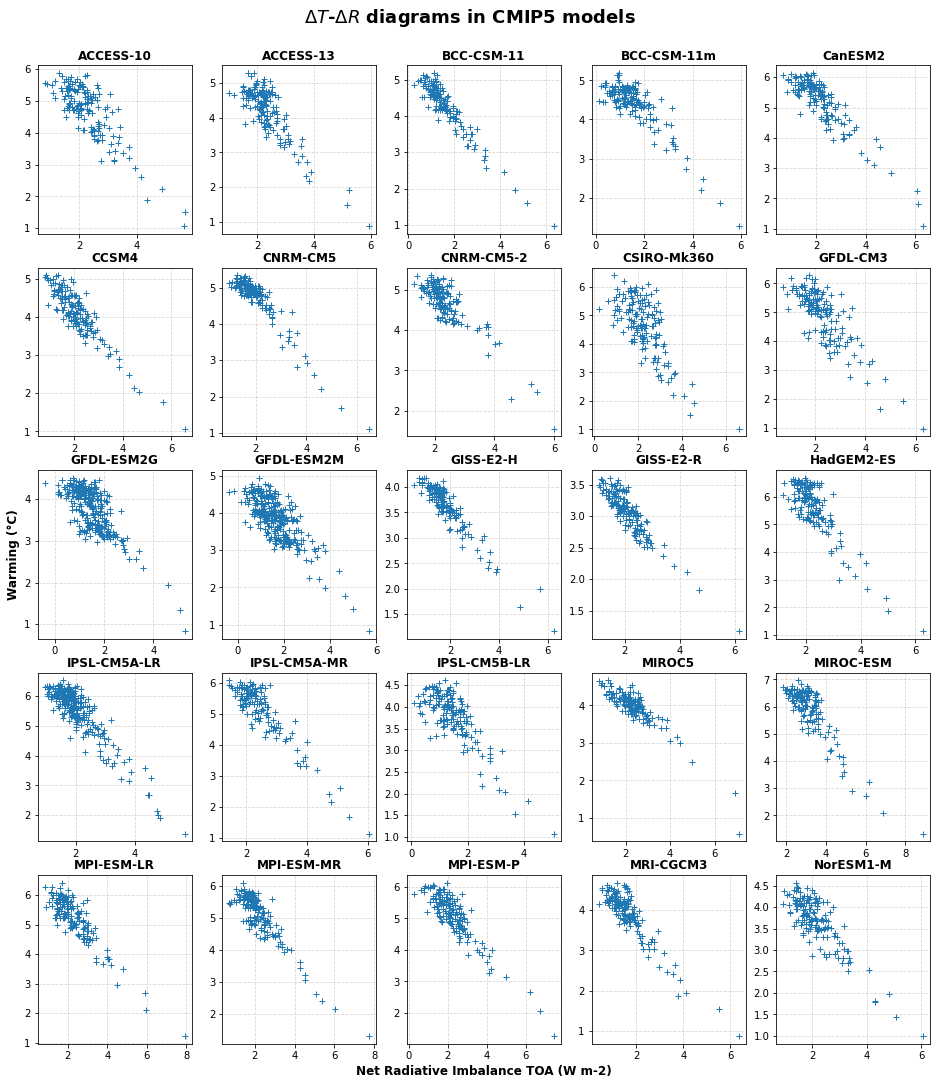

In [6]:
fig, ax = plt.subplots(5,5, figsize=(16,18))
for mod in model_list:
    m = model_list.index(mod)
    axis = ax[m//5,m%5]
    axis.plot(netImbalance[:,m],Warming[:,m],marker='+',ls='none')
    axis.set_title(mod, fontweight="bold")
    
    if axis==ax[4,2]:
        axis.set_xlabel('Net Radiative Imbalance TOA (W m-2)', fontsize=12, fontweight="bold")
    if axis==ax[2,0]:
        axis.set_ylabel('Warming (°C)', fontsize=12, fontweight="bold")
        
for axis in ax.ravel() :
    axis.grid("on", alpha=0.5, ls="--")

fig.suptitle(r"$\Delta T$-$\Delta R$ diagrams in CMIP5 models", fontweight="bold", fontsize=18, y=0.925)

### 2.2 Computing the ECS

Now, we will employ the approach proposed by [Gregory et al. (2004)](https://doi.org/10.1029/2003GL018747) to determine the
climate sensitivity at the equilibrium. This approach relies on the same conclusion
you have done.

#### Question 5:

* _On the previous figure, is there a way to determine the ECS ?_

__Help__ : Look carefully at the definition of ECS (the temperature at the new equilibrium).

<font color="blue">

The ECS is reached when the radiative imbalance has reached a steady state ($\Delta R = 0$). Fitting a linear line to find the y-intercept in the $\Delta T$-$\Delta R$ diagram leads to the ECS, $\left(\Delta T\right)_\text{eq}$. For a correlation plot in the $\Delta R$-$\Delta T$ diagram, the ECS is given by the x-intercept.

However, note that this is the ECS of 4xCO2. The standard ECS measurement is done for 2xCO2. 
By calculating the sensitivity parameter $\lambda$ (i.e. the slope in the $\Delta R$-$\Delta T$ diagram), we will deduce the climate sensitivity of 2xCO2.

</font>

* _Plot this method on the previous figure._

__Help__: Below is a set of lines to compute ECS :

In [7]:
# fit equilibrium temperature change
coeff = np.zeros(len(model_list))
T4x = np.zeros(len(model_list))
for mod in model_list:
    m = model_list.index(mod)
    length = model_length[mod] #
    
    def err(var):
        # function to minimize: D_T = -1/lambda * D_R + T_eq
        #   --> var[0] = -1/lambda;  var[1] = T_eq
        D_T = var[0] * ((netrad_quad-netrad_ctrl)[:length,m]) + var[1]
        return sum(( D_T - (tas_quad-tas_ctrl)[:length,m] )**2)
    
    [coeff[m],T4x[m]] = fmin(err,[-1.,3.],disp=False)

Text(0.5, 0.91, '')

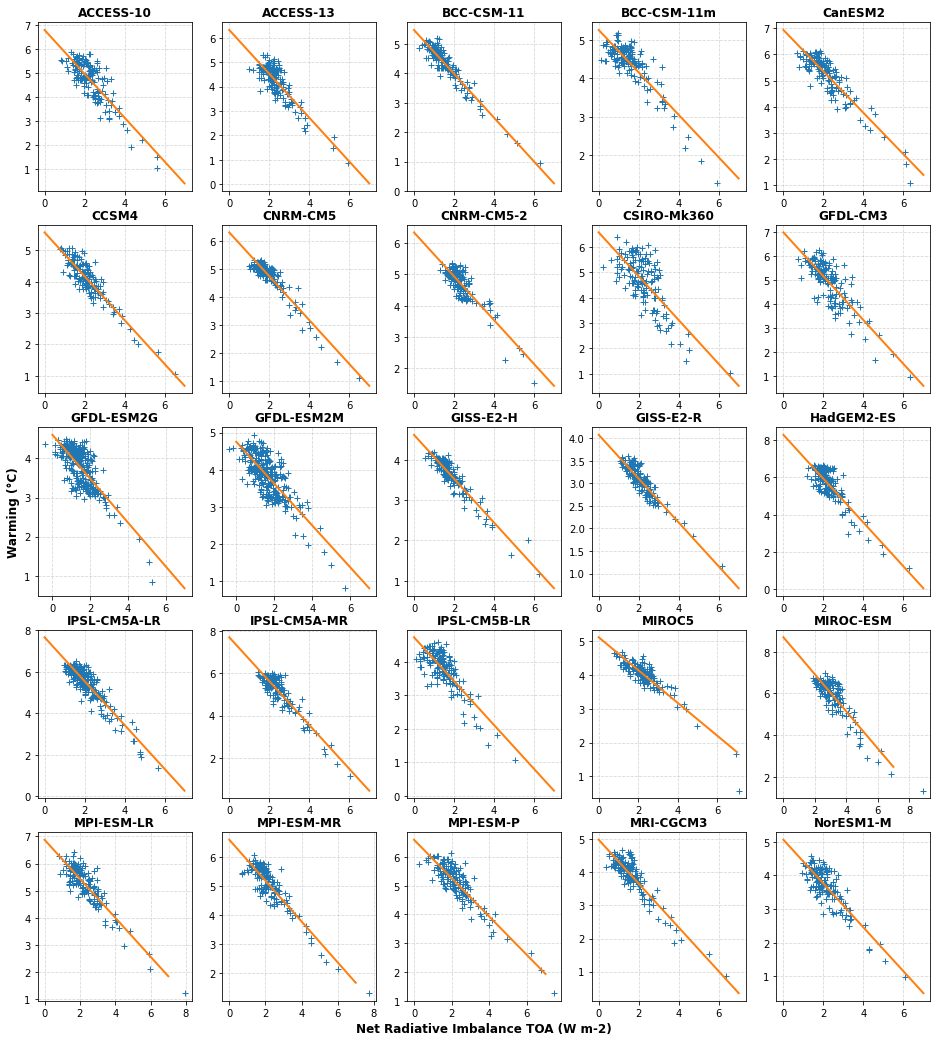

In [8]:
fig, ax = plt.subplots(5,5, figsize=(16,18))
for mod in model_list:
    m = model_list.index(mod)
    axis = ax[m//5,m%5]
    axis.plot(netImbalance[:,m],Warming[:,m],marker='+',ls='none')
    axis.plot(np.arange(0,8),coeff[m]*np.arange(0,8)+T4x[m],lw=2)   
    axis.set_title(mod, fontweight="bold")
    
    if axis==ax[4,2]:
        axis.set_xlabel('Net Radiative Imbalance TOA (W m-2)', fontsize=12, fontweight="bold")
    if axis==ax[2,0]:
        axis.set_ylabel('Warming (°C)', fontsize=12, fontweight="bold")
        
for axis in ax.ravel() :
    axis.grid("on", alpha=0.5, ls="--")
    
fig.suptitle("", fontweight="bold", y=0.91)

Since the third IPCC report [Ramaswamy et al., 2001](https://www.ipcc.ch/reports/?rp=ar3), the radiative forcing for CO$_2$ is
deduced from the relationship :

$$ F_{\text{CO}_2}= 5.35 \times \ln\left(\frac{\text{CO}_2(t)}{\text{CO}_2(t=0)}\right)$$

#### Question 6:

* _What is the feedback parameter $\lambda$ (in $W m^{2} K^{-1}$) and the implied ECS (in $K$) of each model, considering that canonical ECS is given for a doubling of CO$_2$ ?_

__Note__: $|\lambda| = F/\left(\Delta T\right)_\text{eq}$

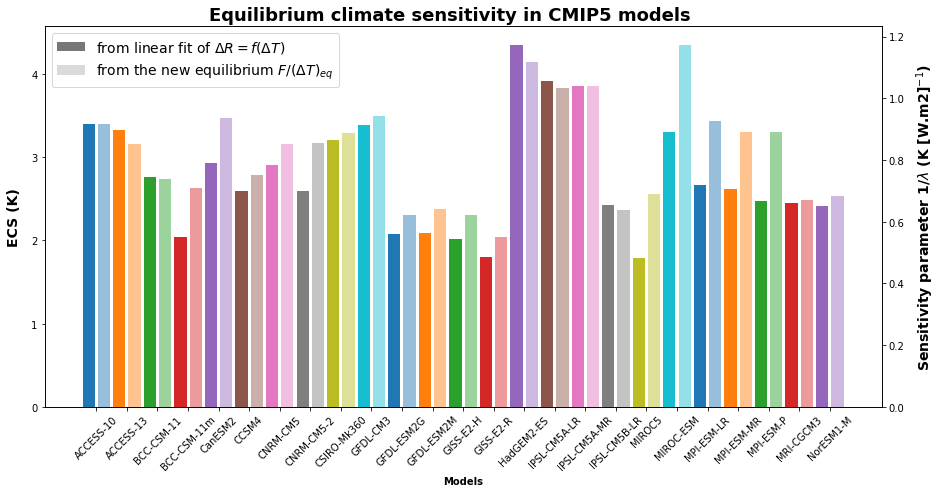

In [9]:
# Deduced the climate sensitivity parameter (lambda)
# 1. from the linear fit
lambda_fit = -1/coeff

# 2. from the analytical IPCC CO2 forcing relationship --> lambda = (-F / D_T)_4xCO2
lambda_for = (5.35*np.log(4)) / T4x

# Retreive the sensitivity for abrupt doubling CO2
# ECS = F_2xCO2 * lambda 
ECS_fit = (5.35*np.log(2))/lambda_fit
ECS_for = (5.35*np.log(2))/lambda_for

# Figures
fig, ax = plt.subplots(1, 1, figsize=(15,7))

# default colors
lcolors_brut  = list(matplotlib.colors.TABLEAU_COLORS.values())
lcolors_alph  = ['{}44'.format(c) for c in lcolors_brut ]
lcolors       = np.insert(lcolors_alph, range(len(lcolors_brut)), lcolors_brut)

# ECS
ECSs = np.insert(ECS_for, range(len(ECS_fit)), ECS_fit)

ax.bar(np.arange(len(model_list)*2), ECSs, color=lcolors)
ax.set_ylabel(r"ECS (K)", fontweight="bold", fontsize=14, labelpad=10)
ax.set_xlabel("Models"  , fontweight="bold")

ax.set_xticks(0.5+np.arange(0, len(model_list)*2, 2))
ax.set_xticklabels(model_list, rotation=45)

# Sensitivity parameter
lambdas = np.insert(lambda_for, range(len(lambda_for)), lambda_fit)

ax = ax.twinx()
ax.bar(np.arange(len(model_list)*2), 1/lambdas, color=lcolors)
ax.set_ylabel(r"Sensitivity parameter 1/$\lambda$ (K [W.m2]$^{−1}$)", fontweight="bold", fontsize=14, labelpad=10)

fig.suptitle("Equilibrium climate sensitivity in CMIP5 models", fontweight="bold", fontsize=18, y=0.92)

patch_fit = matplotlib.patches.Patch(facecolor='#777'     , label=r'from linear fit of $\Delta R = f(\Delta T)$')
patch_for = matplotlib.patches.Patch(facecolor='#77777744', label='from the new equilibrium $F/(\Delta T)_{eq}$')

ax.legend(handles=[patch_fit, patch_for], fontsize=14)

<font color="blue">

Again, the figure illustrates the large range between CMIP5 models. GFDL and GISS models show the highest climate sensitivity ($3.5-4.2^oC$ associated to $1.0-1.2 \, K [W.m^2]^{-1}$).

Since, the ECS is deduced from the IPCC forcing formulation using the sensitivity parameter $\lambda$, the ECS (left) and $\lambda$ (right) are  scaled by a factor $5.35 \times \ln(4)$.

Finally, two methods were used to compute $\lambda$:
- using the linear fit in the $\Delta R$-$\Delta T$ diagram
- using the relation $\lambda = F/\left(\Delta T\right)_\text{eq}$
  
The difference btween the two is related to how much the external forcings by quadrupling CO2 concentration fit the logarithmic law of the IPCC.
In our CMIP5 models, $F$ can be deduced from our linear fit (Question 5) for $\Delta T = 0$, leading to $\Delta R = F$.
</font>

Text(0.5, 0.92, 'Radiative forcings induced by 4xCO2 concentration in CMIP5 models')

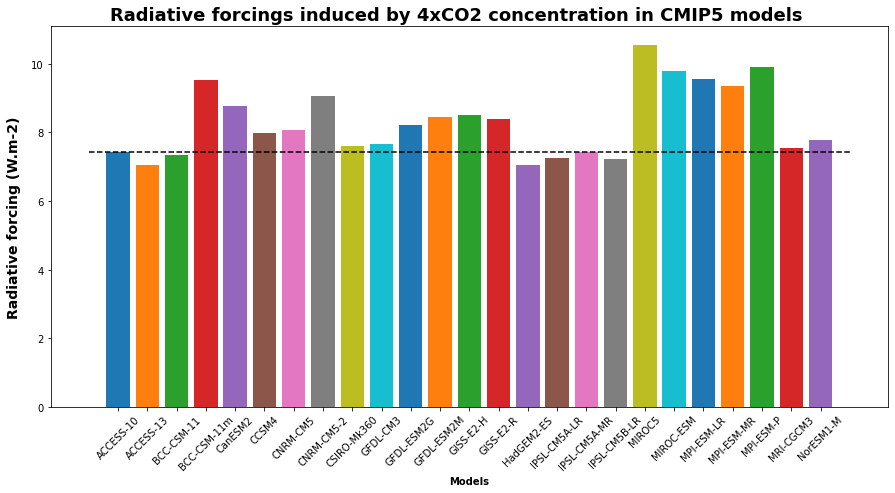

In [10]:
F_4xC02 = -1/coeff*T4x

# Figures
fig, ax = plt.subplots(1, 1, figsize=(15,7))

# CO2 forcings
ax.bar(np.arange(len(model_list)), F_4xC02, color=lcolors_brut)
ax.plot(np.arange(-1, len(model_list)+1), np.ones(len(model_list)+2)*5.35*np.log(4), ls='--', c='k')
ax.set_ylabel(r"Radiative forcing (W.m-2)", fontweight="bold", fontsize=14, labelpad=10)
ax.set_xlabel("Models"  , fontweight="bold")

ax.set_xticks(np.arange(0, len(model_list)))
ax.set_xticklabels(model_list, rotation=45)

fig.suptitle("Radiative forcings induced by 4xCO2 concentration in CMIP5 models", fontweight="bold", fontsize=18, y=0.92)

<font color="blue">

Largest differences with the 5.35 x ln(4) black line are indeed found for MIROC and MPI models. 

</font>

#### Question 7:

* _Based on this analysis, do you think that another method could out-perform a 
linear fit proposed by [Gregory et al. (2004)](https://doi.org/10.1029/2003GL018747) ? What about the choice of a constant $\lambda$ ?_

<font color="blue">

We can see that in all models the climate has not reached the steady state yet ($\Delta R=0$). 
For these short runs (<150 years) a linear approach works. But for longer simulations several processes may at play at different timescales (e.g. slow deep ocean adjustement) which raise question about a linear fit.

There is also growing concern that assuming a single constant $\lambda$ (the climate sensitivity or feedback parameter) is unrealistic. Doing so would imply that ECS for doubling CO$_2$ in a fully coupled model is the same as the effective climate sensitivity extrapolated from a transient simulation. But we know that the climate response is spatially heterogeneous with some climate feedbacks that are not necessarily linear with increasing temperature (e.g. tipping points).

In conclusion, the evolution of temperature reponse ($\Delta T$) and net radiative imbalance ($\Delta R$) over time clearly deviates from a straight line implied by a constant parameter $\lambda$. The slope of the regression is also not constant for most CMIP5 models due to both short-term atmospheric and oceanic adjustments and due to feedbacks and warming patterns changing over time.

</font>

### 2.3 Investigate time variation of climate sensitivity

[Knutti et al. (2017)](https://doi.org/10.1038/ngeo3017) (see Figure below) show that ECS varies across time scales. Here,
we will perform this analysis across available CMIP5 models and try to characterize this
phenomenon.

<div align='center'>
    <img src="./figures/ECS_Model_Knutti2017.png" alt="drawing" width="600"/>
</div>

#### Question 8:

* _Create a figure showing change in ECS estimate as a function of time-scales =
interannual O(1-5yrs) and centennial (10-100yrs)._

__Note__: try to create the figure above, as in [Knutti et al. (2017)](https://doi.org/10.1038/ngeo3017) 

In [11]:
# fit equilibrium temperature change at different timescales

coeff_1, T4x_1 = np.zeros(len(model_list)), np.zeros(len(model_list))
coeff_2, T4x_2 = np.zeros(len(model_list)), np.zeros(len(model_list))

for mod in model_list:
    m  = model_list.index(mod)
    
    def err(var, year1, year2):
        # function to minimize: D_T = -1/lambda * D_R + T_eq
        #   --> var[0] = -1/lambda;  var[1] = T_eq
        D_T = var[0] * netImbalance[year1:year2,m] + var[1]
        return sum( np.square( D_T - Warming[year1:year2,m]) )
    
    [coeff_1[m],T4x_1[m]] = fmin(err, [-1.,3.], args=(0,5),      disp=False)
    [coeff_2[m],T4x_2[m]] = fmin(err, [-0.5, 4.], args=(10,100), disp=False)

Text(0.5, 0.91, '')

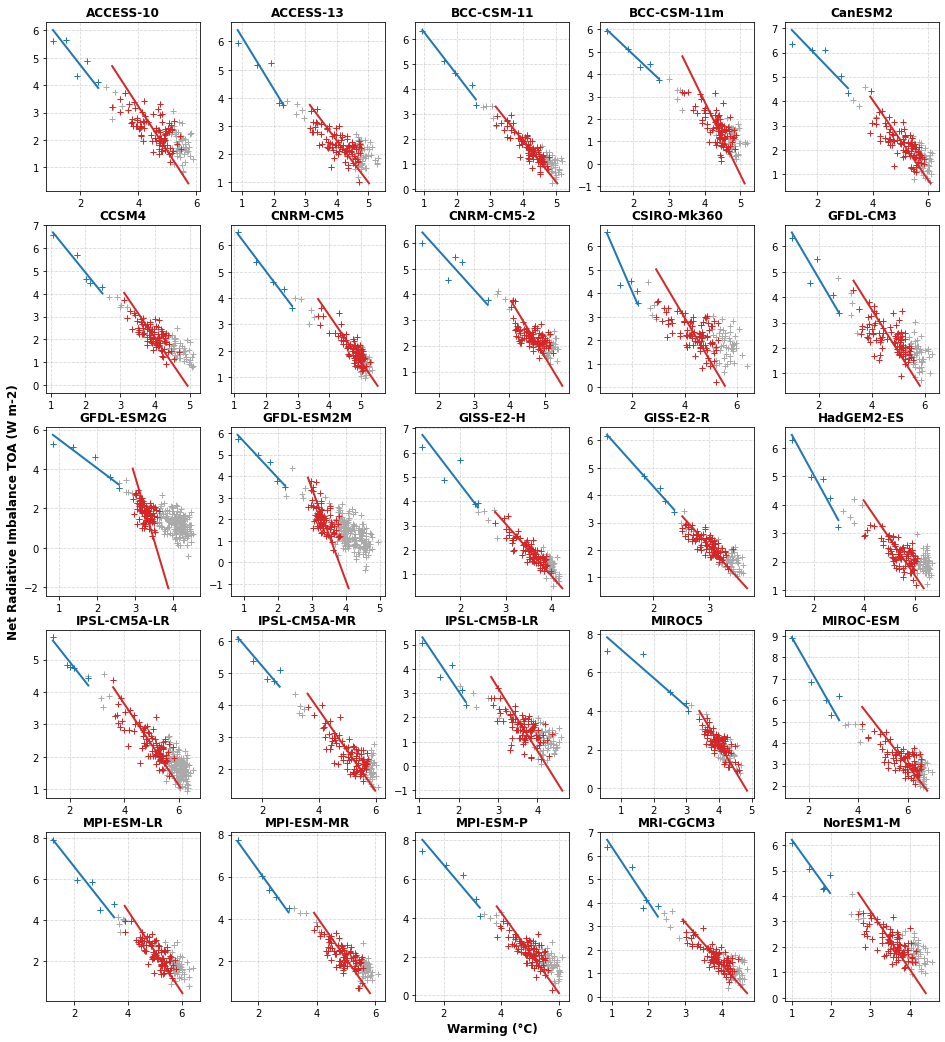

In [12]:
fig, ax = plt.subplots(5,5, figsize=(16,18))
for mod in model_list:
    m = model_list.index(mod)
    axis = ax[m//5,m%5]
    
    axis.plot(Warming[:,m],   netImbalance[:,m],         marker='+', c='#aaa',     ls='none')
    axis.plot(Warming[0:5,m], netImbalance[0:5,m],       marker='+', c='tab:blue', ls='none')
    axis.plot(Warming[10:100,m], netImbalance[10:100,m], marker='+', c='tab:red',  ls='none')

    dT_1 = np.linspace(min(Warming[0:5,m]),    max(Warming[1:5,m]))
    dT_2 = np.linspace(min(Warming[10:100,m]), max(Warming[10:100,m])+0.25)

    axis.plot(dT_1, 1/coeff_1[m]*dT_1 - 1/coeff_1[m]*T4x_1[m], c='tab:blue', lw=2)  
    axis.plot(dT_2, 1/coeff_2[m]*dT_2 - 1/coeff_2[m]*T4x_2[m], c='tab:red',  lw=2)   

    axis.set_title(mod, fontweight="bold")
    
    if axis==ax[4,2]:
        axis.set_xlabel('Warming (°C)', fontsize=12, fontweight="bold")
    if axis==ax[2,0]:
        axis.set_ylabel('Net Radiative Imbalance TOA (W m-2)', fontsize=12, fontweight="bold")
        
for axis in ax.ravel() :
    axis.grid("on", alpha=0.5, ls="--")
    
fig.suptitle("", fontweight="bold", y=0.91)

<font color="blue">

On many models, the linear regression between years 50-100 failed (e.g. GFDL-ESM) meaning that data are too sparse and not well correlated. 
Indeed, ECS is sometimes lowered at centennial timescales compared to one computed on interannual timescales.

Using the CMIP5 model-mean could perform better.
</font>

#### Question 9:

* _Discuss potential explainations for those fluctuations, i.e., is there a link between
variations in ECS and amplitude of internal variability (standard deviation of tas)._

<font color="blue">

Coupled atmosphere-ocean models, take millennia to reach a new steady state, making analysis of the climate sensitivity difficult.
Indeed, ocean and atmopshere circulations are changed due to external forcings, leading to non-linear feedbacks that can arise at different time-scales. 

In addition, the climate exhibits a natural variability that results in seemingly-random variation of climate variable (such as the surface temperature) at different frequencies.

</font>

#### Question 10:

* _Using a conceptual model (e.g. exponential), fit the evolution of the surface temperature across a range of time-scales._

__Help__: Use the fitting optimization code (Questions 5 and 8) to find the best parameters ($a_0$, $a_1$) that fit: $tas = a_0 \exp\left(-a_1 t\right)$. This fit is supposed to take into account that the climate sensitivity varies accross the simulation.

In [13]:
# 
a_0 = np.zeros(len(model_list))
a_1 = np.zeros(len(model_list))

for mod in model_list:
    m = model_list.index(mod)
    l = model_length[mod]
    t = np.arange(0, l)+0.5
    
    def err(var):
        # function to minimize: D_T = a_0 + a_1*sqrt(t)
        #   --> var[0] = a_0;  var[1] = a_1; var[2] = a_2
        D_T = var[0] * np.exp(-var[1]*netImbalance[:l,m])
        return np.nansum(( D_T - (tas_quad-tas_ctrl)[:l,m] )**2)
            
    [a_0[m],a_1[m]] = fmin(err, [1.,1.], disp=False)

* _Plot a figure to check your fitting function._

Text(0.5, 0.91, '')

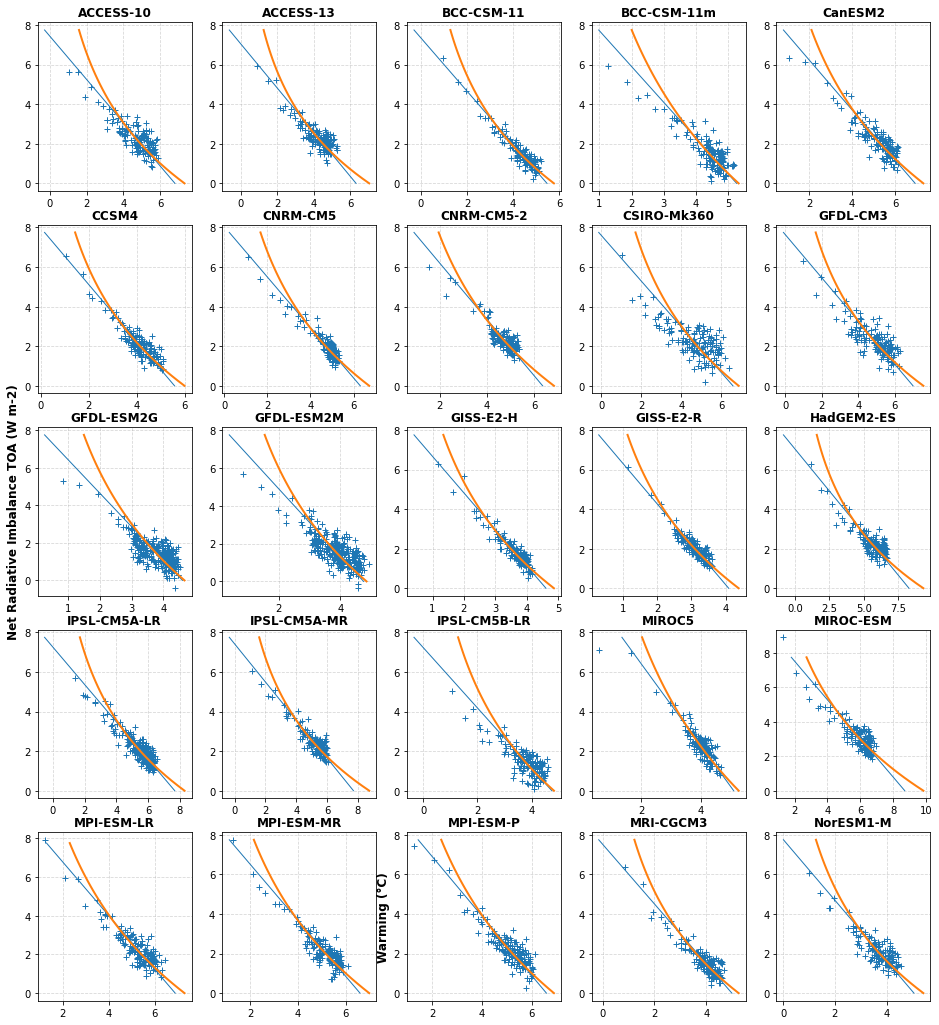

In [14]:
fig, ax = plt.subplots(5,5, figsize=(16,18))
for mod in model_list:
    m = model_list.index(mod)
    axis = ax[m//5,m%5]

    # scatter plots 
    axis.plot(Warming[:,m],   netImbalance[:,m],         marker='+', c='tab:blue',     ls='none')

    # superimpose with linear and exponential regression
    dR = np.arange(0,8,.25)
    axis.plot(coeff[m] * dR + T4x[m]     , dR, c='tab:blue',   lw=1)  
    axis.plot(a_0[m] * np.exp(-a_1[m]*dR), dR, c='tab:orange', lw=2)  

    axis.set_title(mod, fontweight="bold")
    
    if axis==ax[4,2]:
        axis.set_ylabel('Warming (°C)', fontsize=12, fontweight="bold")
    if axis==ax[2,0]:
        axis.set_ylabel('Net Radiative Imbalance TOA (W m-2)', fontsize=12, fontweight="bold")
        
for axis in ax.ravel() :
    axis.grid("on", alpha=0.5, ls="--")
    
fig.suptitle("", fontweight="bold", y=0.91)

#### Question 11:

* _Using your model, estimate ECS at millenial time-scale which is close to the Earth
system sensitivity._

__Help__: Think about the parameter $a_0$ (and its units).

Text(0.5, 0.92, 'Equilibrium climate sensitivity in CMIP5 models')

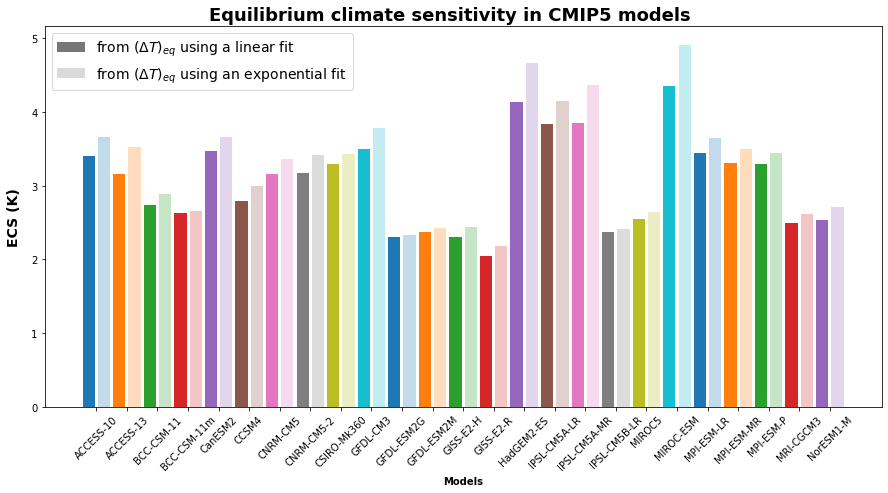

In [15]:
# Computing the ECS at at millenial time-scale

# After millenia, the system has reached a steady-state (dR = 0)
Teq = a_0 * np.exp(-a_1 * 0)

# Deduced the climate sensitivity parameter (lambda) 
lambda_mil = (5.35*np.log(4)) / Teq

# Retreive the sensitivity for abrupt doubling CO2
# ECS = F_2xCO2 * lambda 
ECS = (5.35*np.log(2))/lambda_mil

# Figures
fig, ax = plt.subplots(1, 1, figsize=(15,7))

# ECS
ECSs = np.insert(ECS, range(len(ECS_for)), ECS_for)

ax.bar(np.arange(len(model_list)*2), ECSs, color=lcolors)
ax.set_ylabel(r"ECS (K)", fontweight="bold", fontsize=14, labelpad=10)
ax.set_xlabel("Models"  , fontweight="bold")

ax.set_xticks(0.5+np.arange(0, len(model_list)*2, 2))
ax.set_xticklabels(model_list, rotation=45)

patch_fit = matplotlib.patches.Patch(facecolor='#777'     , label=r'from $(\Delta T)_{eq}$ using a linear fit')
patch_for = matplotlib.patches.Patch(facecolor='#77777744', label=r'from $(\Delta T)_{eq}$ using an exponential fit')

ax.legend(handles=[patch_fit, patch_for], fontsize=14)

fig.suptitle("Equilibrium climate sensitivity in CMIP5 models", fontweight="bold", fontsize=18, y=0.92)

<font color="blue">

In this figure, we compare the equilibrated temperature for a doubling CO$_2$ (the ECS) computed from a linear fit and en exponential one. Interestingly, the later gives higher ECS in allmost all models. This was expected (look at the figure a of [Knutti et al. (2017)](https://doi.org/10.1038/ngeo3017)) since non-linear climate feedacks can act on centennial or longer timescales rendering the equilibration of climate models quite long.   

It is worthnoting that due to this long equilibration time, the linear regression seems to work better using our shorts simulations (of about 150 years), in particular on yearly timescales. Results could be different and more robust with longer simulations. 

</font>

## 3. Detection & Attribution of climate change

### 3.1 Elaborate the tas IRF

Now that the ECS for a quadrupling of CO2 is known, we can try to model changes in surface temperature with this simple formulation :
$$ tas(t) = \text{ECS}_{\text{4xCO}_2} \left[1 - a_{T,1}\exp(\frac{-t}{\tau_{T,1}}) - a_{T,2}\exp(\frac{-t}{\tau_{T,2}})\right]$$


#### Question 12:

* *Determine the 4 parameters $a_{T,1}$ , $a_{T,2}$ , $\tau_{T,1}$ and $\tau_{T,2}$ . Check if the computation match graphical analysis.*

__Help__: $a_{T,1} + a_{T,2} = 1$

In [16]:
# fit dynamical parameters
a_T1   = np.zeros(len(model_list))
tau_T1 = np.zeros(len(model_list))
tau_T2 = np.zeros(len(model_list))

for mod in model_list:
    m = model_list.index(mod)
    length = model_length[mod] #!!!
    time = np.arange(0,length)+0.5
    def err(var):
        D_T = T4x[m] * (1 - var[0]*np.exp(-time/var[1]) - (1-var[0])*np.exp(-time/var[2]))
        return sum(( D_T - (tas_quad-tas_ctrl)[:length,m] )**2)  # RMSE (Sum of error squared)
    [a_T1[m],tau_T1[m],tau_T2[m]] = fmin(err,[0.5,2,200],disp=False)
    
a_T2 = 1-a_T1

Text(0.5, 0.91, '')

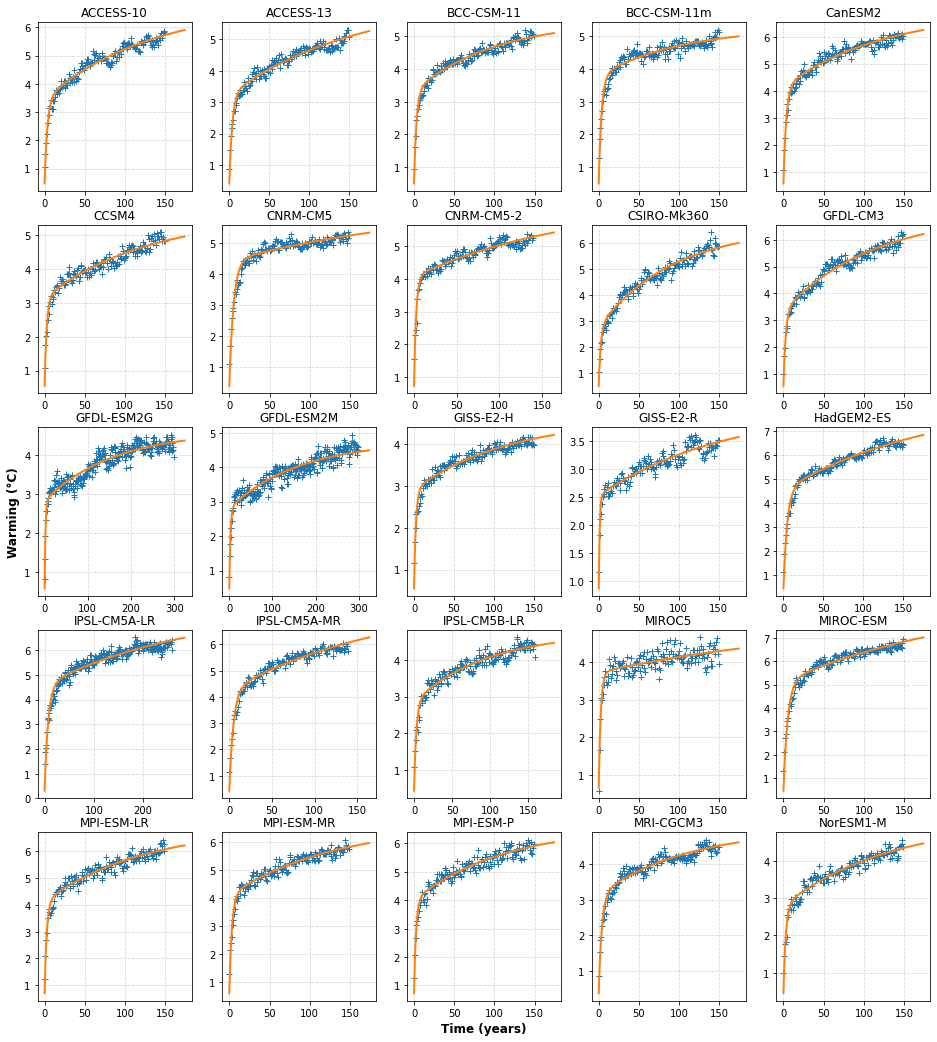

In [17]:
# Plot computation match
fig, ax = plt.subplots(5,5, figsize=(16,18))
for mod in model_list:
    m = model_list.index(mod)
    axis = ax[m//5,m%5]
    plt.subplot(5,5,m+1)
    plt.plot((tas_quad-tas_ctrl)[:,m],marker='+',ls='none')  

    t = np.arange(model_length[mod]+25)+0.5
    plt.plot(T4x[m]*(1 - a_T1[m]*np.exp(-t/tau_T1[m]) - a_T2[m]*np.exp(-t/tau_T2[m])),lw=2)
    plt.title(mod)
    
    if axis==ax[4,2]:
        axis.set_xlabel('Time (years)', fontsize=12, fontweight="bold")
    if axis==ax[2,0]:
        axis.set_ylabel('Warming (°C)', fontsize=12, fontweight="bold")
        
for axis in ax.ravel() :
    axis.grid("on", alpha=0.5, ls="--")
    
fig.suptitle("", fontweight="bold", y=0.91)

#### Question 13:

* *Determine the derivative of the tas function to get the IRF for surface temperature. Explain what is representing this IRF ?*

<font color="blue">

$$\text{IRF}_\text{tas}(t) = \frac{\partial tas(t)}{\partial t} = \text{ECS}_{\text{4xCO}_2} \left[\frac{a_{T,1}}{\tau_{T,1}}\exp(\frac{-t}{\tau_{T,1}}) + \frac{a_{T,2}}{\tau_{T,2}}\exp(\frac{-t}{\tau_{T,2}})\right]$$


This function represent how fast the global Earth surface temperature rises in our 4xCO2 simulations.

</font>

* *Compute the IRF for each CMIP5 models.*

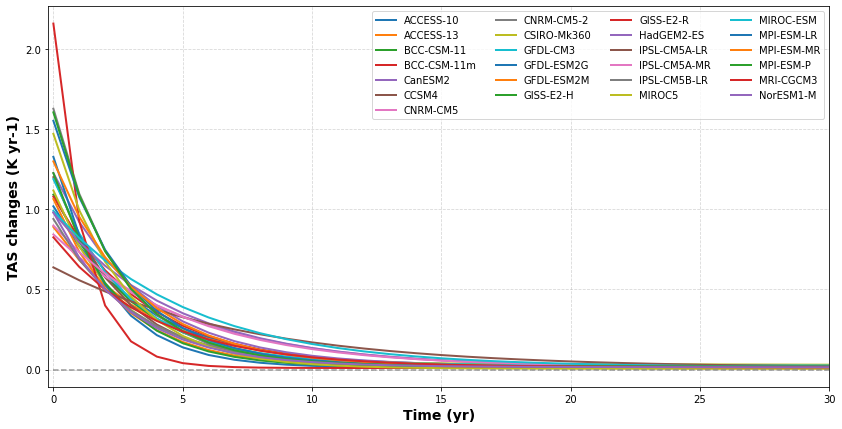

In [18]:
# Create IRF for surface temperature
irf_TAS = lambda t: T4x[m] * (a_T1[m]/tau_T1[m]*np.exp(-t/tau_T1[m]) + a_T2[m]/tau_T2[m]*np.exp(-t/tau_T2[m]))

# Create figure
fig, ax = plt.subplots(1,1, figsize=(14,7))

for mod in model_list:
    m = model_list.index(mod)
    ax.set_xlabel('Time (yr)',            fontsize=14, fontweight="bold")
    ax.set_ylabel('TAS changes (K yr-1)', fontsize=14, fontweight="bold")
    ax.plot(irf_TAS(np.arange(0,50)),lw=2)
    
ax.legend(np.array(model_list), ncol=4, bbox_to_anchor=(1., +0.5, 0, 0.5))

ax.hlines(0,0,300, color="grey", ls="--", alpha=0.8)
ax.set_xlim([-0.2,30])
ax.grid("on", alpha=0.5, ls="--")

### 3.2 Atributed changes in tas

With the IRF for surface temperature established, we can try to detect and attribute impact
of climate change on observed global mean temperature. Estimate of radiative forcings at
top of the atmosphere from observations employed in the IPCC report can be loaded using
the following set of commands :


In [29]:
# load the historical data on radiative forcing by IPCC
RF_comp = np.array([line for line in \
csv.reader(open("data/Historic_IPCC.1750-2011.RF.csv","r"))]\
[1:],dtype=float)[:,:] #{W/m2}
RF_comp[:,-1] *= 0.7 # arbitrary climate efficiency for volcanoes
RF_lgd = [line for line in \
csv.reader(open("data/Historic_IPCC.1750-2011.RF.csv","r"))][0]
RF_all = np.sum(RF_comp,1)

RF_lgd

['CO2',
 'GHG Other',
 'O3 (Trop)',
 'O3 (Strat)',
 'Aerosol (Total)',
 'LUC',
 'H2O (Strat)',
 'BC Snow',
 'Contrails',
 'Solar',
 'Volcano']

#### Question 14:

* _Using one of the convolution methods (see Part I) as well as the previous dataset, determine
change in surface temperature as simulated by each CMIP5 model._

$$\Delta T (t) = \int_0^t{F(t')\,\text{IRF}(t-t')\,dt'}$$

__Note__: be careful with the units (the IRF should be in K $[$W m$^{-2}]^{-1}$ in order to have K..)

In [32]:
# simulate historical change in temperature
D_TAS_all = np.zeros([len(RF_all),len(model_list)])
time = np.arange(len(RF_all))
for mod in model_list:
    m = model_list.index(mod)
    T_to_RF = lambda_fit[m] * T4x[m]  # required to get degree after the convolution product
    D_TAS_all[:,m] = np.convolve(RF_all, 1/T_to_RF*irf_TAS(time))[:len(time)]

Text(0.5, 0.91, '')

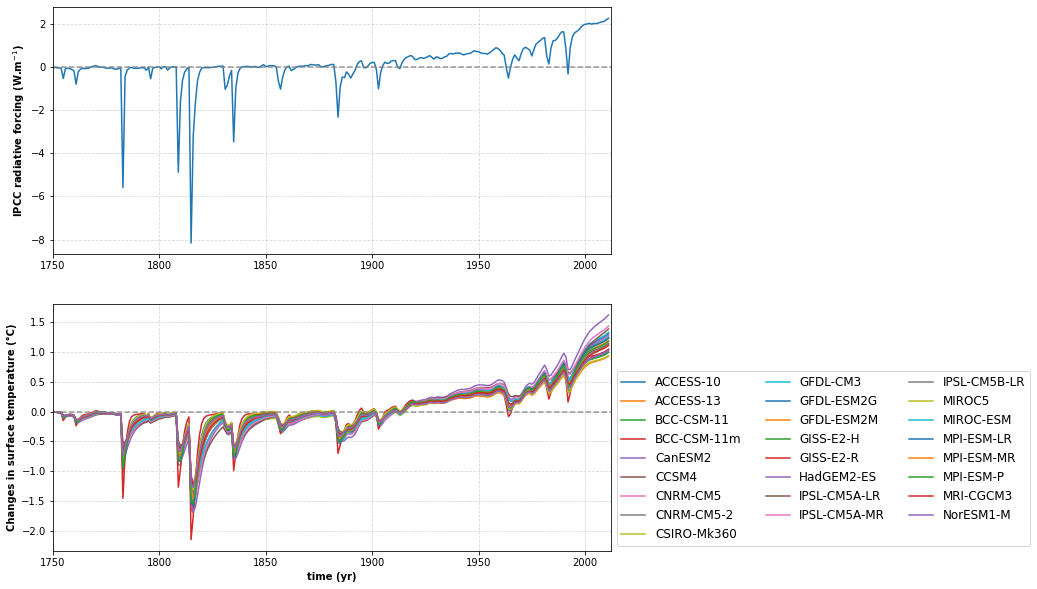

In [33]:
fig, ax = plt.subplots(2,1, figsize=(10,10))

ax[0].plot(np.arange(1750,2012), RF_all)
ax[0].set_ylabel('IPCC radiative forcing (W.m$^{-1}$)', fontweight="bold")

    
for mod in model_list:
    m = model_list.index(mod)
    ax[1].plot(np.arange(1750,2012), D_TAS_all[:,m])
    ax[1].set_xlabel('time (yr)', fontweight="bold")
    ax[1].set_ylabel('Changes in surface temperature (°C)', fontweight="bold")
    
ax[1].legend(np.array(model_list), ncol=3, fontsize=12, bbox_to_anchor=(1., 0.25, 0.5, 0.5))

for axis in ax :
    axis.hlines(0,1750,2012, color="grey", ls="--", alpha=0.8)
    axis.set_xlim([1750,2012])
    axis.grid("on", alpha=0.5, ls="--")
    
fig.suptitle("", fontweight="bold", y=0.91)

#### Question 15:

* _Compare these simulations to that observed since 1880. In order to compare changes
in surface temperature, one uses 1900-1920 as a reference period. That is, we will
analyse temperature anomaly with the respect to the 1900-1920 average._

__Help :__ Observed data of global mean surface temperature can be loaded using :_
```python
# load temperature reconstructions by NASA/GISS
GMT_giss = np.array([line for line in \
    csv.reader(open("data/HistClim_GISS.1880-2014.gmt.csv","r"))], dtype=float)[:,0] #{degC}
```

In [34]:
# load temperature reconstructions by NASA/GISS
GMT_giss = np.array([line for line in \
    csv.reader(open("data/HistClim_GISS.1880-2014.gmt.csv","r"))], dtype=float)[:,0] #{degC}

Text(0.5, 0.95, '')

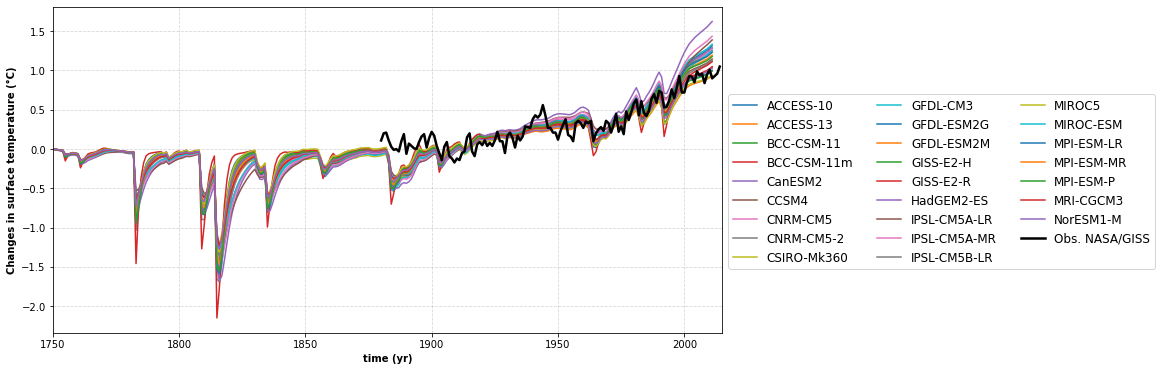

In [35]:
# NET IMBALANCE vs TEMPERATURE
fig, ax = plt.subplots(1,1, figsize=(12,6))

# Reconstruction using convolution method
for mod in model_list:
    m = model_list.index(mod)
    ax.plot(np.arange(1750,2012), D_TAS_all[:,m])
    ax.set_xlabel('time (yr)', fontweight="bold")
    ax.set_ylabel('Changes in surface temperature (°C)', fontweight="bold")

# Observations NASA/GISS
ax.plot(np.arange(1880,2015),GMT_giss-np.mean(GMT_giss[20:40]), color='k',lw=2.5)

# add obs to legend
model_list_extented = model_list.copy()
model_list_extented.append("Obs. NASA/GISS")

ax.legend(np.array(model_list_extented), ncol=3, fontsize=12, bbox_to_anchor=(1., 0.25, 0.5, 0.5))

ax.hlines(0,0,300, color="grey", ls="--", alpha=0.8)
ax.set_xlim([1750,2015])
ax.grid("on", alpha=0.5, ls="--")
    
fig.suptitle("", fontweight="bold", y=0.95)

<font color="blue">

To a first order, the method works well: results show an acceleration in the Earth surface warming starting from ~1980.
However, the IPCC product (black curve) presents some noise while our reconstructions are smoother. 
This was expected since we have used a simple model (2 exponential fit) to predict the IRF of the surface temperature (tas). 

One can also note that our temperature change reconstruction shows a larger warming than the observational-based product in almost all models. This suggest that our climate sensitivity (both the ECS and the feedback parameter $\lambda$) is probably underestimated.
As discussed in previous questions, this is likely due to the use of short-term simulations (~150 years) and to the constant $\lambda$ hypothesis. 

</font>

#### Question 16:

* *Repeat the previous computation keeping solely (1) natural forcings (last column of 
RF_comp) or (2) anthropogenic forcings. Present figures from each analyses.*


In [36]:
# Natural forcings only
RF_nat = np.sum(RF_comp[:,-2:],1)
D_TAS_nat = np.zeros([len(RF_nat),len(model_list)])
time = np.arange(len(RF_nat))

for mod in model_list:
    m = model_list.index(mod)
    D_TAS_nat[:,m] = np.convolve(RF_nat,1/T_to_RF*irf_TAS(time))[:len(time)]

In [37]:
# Anthropogenic forcings only
RF_ant = np.sum(RF_comp[:,:-2],1) # anthropic (total)
RF_ghg = np.sum(RF_comp[:,:2],1)  # greenhouse gases
RF_aer = np.sum(RF_comp[:,4:5],1)   # aerosols (human)

D_TAS_ant = np.zeros([len(RF_ant),len(model_list)])
D_TAS_ghg = np.zeros([len(RF_ghg),len(model_list)])
D_TAS_aer = np.zeros([len(RF_aer),len(model_list)])

time = np.arange(len(RF_ant))

for mod in model_list:
    m = model_list.index(mod)
    D_TAS_ant[:,m] = np.convolve(RF_ant,1/T_to_RF*irf_TAS(time))[:len(time)]
    D_TAS_ghg[:,m] = np.convolve(RF_ghg,1/T_to_RF*irf_TAS(time))[:len(time)]
    D_TAS_aer[:,m] = np.convolve(RF_aer,1/T_to_RF*irf_TAS(time))[:len(time)]

Text(0.5, 0.93, 'Simulated warming (1800-2011) for different causes')

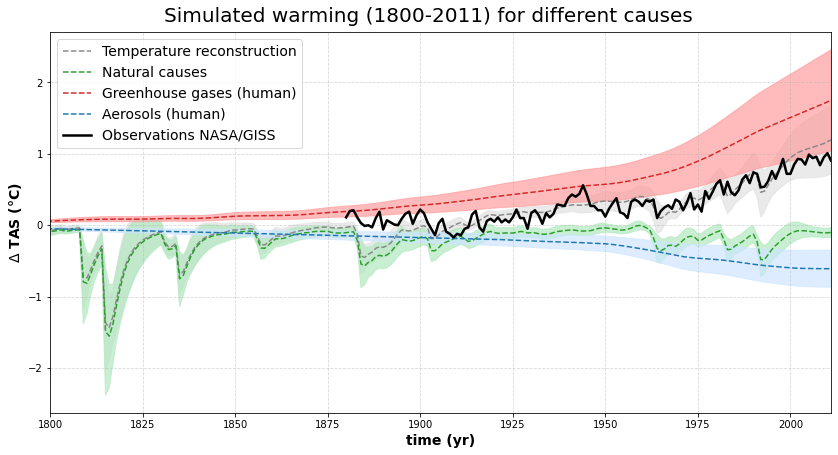

In [38]:
# Figure
fig, ax = plt.subplots(1,1, figsize=(14,7))

# Reconstruction using convolution method
t = np.arange(1750, 2012)
ax.plot(t, D_TAS_all.mean(axis=1), color="#888", ls='--', label="Temperature reconstruction")
ax.fill_between(t, D_TAS_all.mean(axis=1)+3*D_TAS_all.std(axis=1), 
                   D_TAS_all.mean(axis=1)-3*D_TAS_all.std(axis=1), 
                   color='#E0E0E0aa')

# Natural
ax.plot(t, D_TAS_nat.mean(axis=1), color="tab:green", ls='--', label="Natural causes")
ax.fill_between(t, D_TAS_nat.mean(axis=1)+3*D_TAS_nat.std(axis=1), 
                   D_TAS_nat.mean(axis=1)-3*D_TAS_nat.std(axis=1), 
                   color='#AEE8BDaa')

# Anthropogenic (GHG)
ax.plot(t, D_TAS_ghg.mean(axis=1), color="tab:red", ls='--', label="Greenhouse gases (human)")
ax.fill_between(t, D_TAS_ghg.mean(axis=1)+3*D_TAS_ghg.std(axis=1), 
                   D_TAS_ghg.mean(axis=1)-3*D_TAS_ghg.std(axis=1), 
                   color='#FF9999aa')

# Anthropogenic (aerosol)
ax.plot(t, D_TAS_aer.mean(axis=1), color="tab:blue", ls='--', label="Aerosols (human)")
ax.fill_between(t, D_TAS_aer.mean(axis=1)+3*D_TAS_aer.std(axis=1), 
                   D_TAS_aer.mean(axis=1)-3*D_TAS_aer.std(axis=1), 
                   color='#CCE5FFaa')
    
ax.set_xlabel('time (yr)',          fontsize=14, fontweight="bold")
ax.set_ylabel(r'$\Delta$ TAS (°C)', fontsize=14, fontweight="bold")

# Observations NASA/GISS
ax.plot(np.arange(1880,2015),GMT_giss-np.mean(GMT_giss[20:40]), color='k',lw=2.5, label="Observations NASA/GISS")

ax.hlines(0, 0, 300, color="grey", ls="--", alpha=0.8)
ax.set_xlim([1800, 2011])
ax.grid("on", alpha=0.5, ls="--")

handles, labels = plt.gca().get_legend_handles_labels()
ax.legend(fontsize=14)
    
fig.suptitle("Simulated warming (1800-2011) for different causes", fontsize=20, fontweight="normal", y=0.93)

#### Question 17:

* *Discuss the cause of climate change based on this analysis in the light of the proposed
decomposition of observed forcings and previous section.*
* *To what are due the intense picks in changes of temperature from natural causes ?*

<font color="blue">
    
Climate is influenced by a range of factors but the dominant role of humans in driving recent climate change is clear. 
The main human drivers of climate change are increases in the atmospheric concentrations of greenhouse gases and of aerosols from burning fossil fuels, land use and other sources. The greenhouse gases trap infrared radiation near the surface, warming the climate. Aerosols, like those produced naturally by volcanoes, on average cool the climate by increasing the reflection of sunlight. 
However, this does not compensate the global warming induced by greenhouse gases.

There are two main natural drivers of variations in climate on time scales of decades to centuries. The first is variations in the sun’s activity, which alter the amount of incoming energy from the sun. The second is large volcanic eruptions, which increase the number of small particles (aerosols) in the upper atmosphere that reflect sunlight and cool the surface–an effect that can last for several years. 

</font>

## 4. Analysis of future climate change projections

In this section, we will use the above-defined function to estimate change in surface tempe-
rature under climate change projections. We will use the last IPCC projections, so-called
RCP for Representative concentration pathways.

We start this section by loading variation in radiative forcing for each RCP using the
following set of commands :

In [39]:
# load RCP radiative forcing scenarios
for rcp in ['26','45','60','85','60to45','45to26']:
    TMP = np.array([line for line in csv.reader(open('data/Scen_RCP'+rcp+'.2000-2500.RF.csv','r'))][1:],dtype=float)[:,:] #{W/m2}
    TMP[:,-2] *= 0.7 # arbitrary climate efficiency for volcanoes
    exec('RF_rcp'+rcp+' = np.sum(TMP,1)')

In [40]:
TMP.shape, RF_all.shape, RF_rcp26.shape

((501, 19), (262,), (501,))

#### Question 18:

* *Display time series of radiative forcing from 1750 to 2500 using historical data and
future projections. Explain simply what RCP simulations are.*

__Help :__ You should infer something from the radiative forcing values at year 2100 for each simulation.

In [41]:
time_past   = np.arange(1750, 1750+len(RF_all))
time_future = np.arange(2000, 2000+len(RF_rcp26))

Text(0.5, 0.95, '')

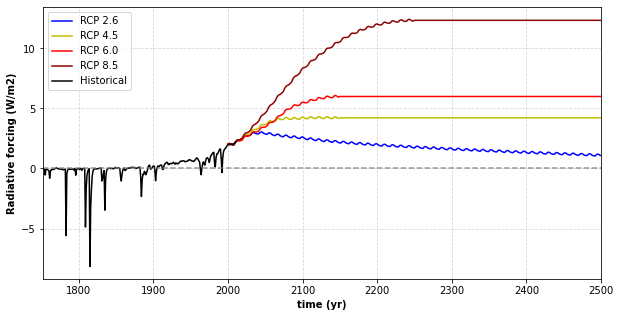

In [42]:
color_dico = {'26':'b','45':'y','60':'r','85':'darkred','60to45':'y','45to26':'c'}

fig, ax = plt.subplots(1,1, figsize=(10,5))

# RCP
for rcp in ['26','45','60','85']:
    plt.plot(time_future, vars()["RF_rcp"+rcp], color=color_dico[rcp], label="RCP {}.{}".format(rcp[0],rcp[1]))
    
# Historical
ax.plot(time_past, RF_all, color='k', label="Historical")

ax.set_xlabel('time (yr)', fontweight="bold")
ax.set_ylabel('Radiative forcing (W/m2)', fontweight="bold")

ax.hlines(0,1752,2500, color="grey", ls="--", alpha=0.8)
ax.set_xlim([1752,2500])
ax.grid("on", alpha=0.5, ls="--")

ax.legend()
    
fig.suptitle("", fontweight="bold", y=0.95)

<font color="blue">
    
RCP stands for Representative Concentration Pathways and are climate change scenarios to project future greenhouse gas concentrations. 
These pathways describe future greenhouse gas concentrations (not emissions) and are labelled after the expected changes in radiative forcing values from the year 1750 to the year 2100. For instance RCP2.6, RCP4.5, RCP6, and RCP8.5 correspond to an induced radiative forcing in 2100 of 2.6, 4.5, 6, and 8.5 W/m2, respectively.
  
</font>

#### Question 19 (bonus):

* *Future projections start in 2000 and radiative forcing between projection of historical
data slightly differ (you can make sure of that by zooming in the last figure). Write
a code in order to ensure continuity in radiative forcing between historical and
projections.*

__Help :__ Use RF_all

Text(0.5, 0.95, 'Zoom on the period 1999-2012')

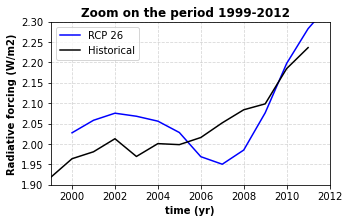

In [87]:
fig, ax = plt.subplots(1,1, figsize=(5,3))

# RCP
ax.plot(time_future, vars()["RF_rcp26"], color=color_dico['26'], label="RCP 26")

# Historical
plt.plot(time_past, RF_all, color='k', label="Historical")

ax.set_xlabel('time (yr)', fontweight="bold")
ax.set_ylabel('Radiative forcing (W/m2)', fontweight="bold")

ax.hlines(0,1752,2500, color="grey", ls="--", alpha=0.8)
ax.set_xlim([1999,2012])
ax.set_ylim([1.9,2.3])
ax.grid("on", alpha=0.5, ls="--")

ax.legend()
    
fig.suptitle("Zoom on the period 1999-2012", fontweight="bold", y=0.95)

In [44]:
# combine historical and projection RF
for rcp in ['26','45','60','85','60to45','45to26']:
    exec('RF_proj'+rcp+' = np.zeros([2500-1750+1])')
    exec('RF_proj'+rcp+'[:261+1] = RF_all[:]')
    exec('RF_proj'+rcp+'[261+1:] = RF_rcp'+rcp+'[12:] + RF_all[261] - RF_rcp'+rcp+'[11]')  

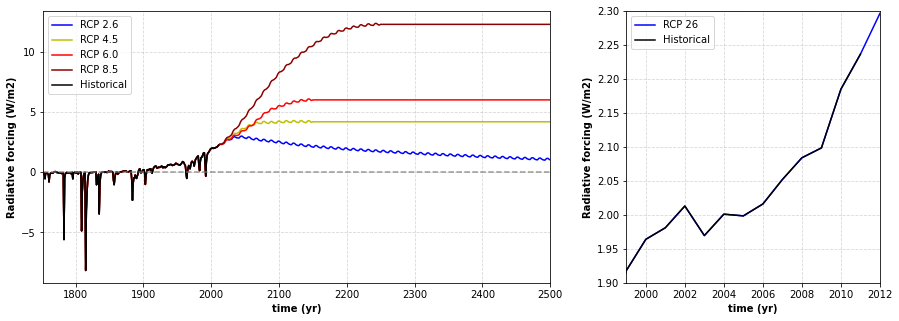

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), gridspec_kw={'width_ratios': [2, 1]})

# Corrected RCP with junction
for rcp in ['26','45','60','85']:
    time_vec = np.arange(1750,1750+len(vars()["RF_proj"+rcp]))
    axes[0].plot(time_vec, vars()["RF_proj"+rcp], color=color_dico[rcp], label="RCP {}.{}".format(rcp[0],rcp[1]))
        
# Historical
axes[0].plot(time_past, RF_all, color='k', label="Historical")

axes[0].set_xlabel('time (yr)', fontweight="bold")
axes[0].set_ylabel('Radiative forcing (W/m2)', fontweight="bold")

axes[0].hlines(0,1752,2500, color="grey", ls="--", alpha=0.8)
axes[0].set_xlim([1752,2500])
axes[0].grid("on", alpha=0.5, ls="--")

axes[0].legend()

# Zoom
axes[1].plot(time_vec , RF_proj26, color=color_dico['26'], label="RCP 26")
axes[1].plot(time_past, RF_all   , color='k'             , label="Historical")

axes[1].set_xlabel('time (yr)', fontweight="bold")
axes[1].set_ylabel('Radiative forcing (W/m2)', fontweight="bold")

axes[1].set_xlim([1999,2012])
axes[1].set_ylim([1.9,2.3])
axes[1].grid("on", alpha=0.5, ls="--")

axes[1].legend()


#### Question 20:

* *For each projection, estimate change in surface temperature. Display the results on a figure.*

In [90]:
# temperature change projections
D_TAS = dict()

for rcp in ['26','45','60','85','60to45','45to26']:
    RF   = vars()['RF_proj{}'.format(rcp)]
    proj = D_TAS.setdefault(rcp, np.zeros([len(RF),len(model_list)]))
    t    = np.arange(len(RF))
    
    for mod in model_list:
        m = model_list.index(mod)
        
        proj[:,m] = np.convolve(RF, 1/T_to_RF*irf_TAS(t))[:len(t)]

In [91]:
D_TAS['60'][162:].shape, np.arange(1750, 1750+D_TAS['60'].shape[0])[162:].shape

((589, 25), (589,))

Text(0.5, 0.93, 'Earth surface temperature change (1950-2150) for different scenario')

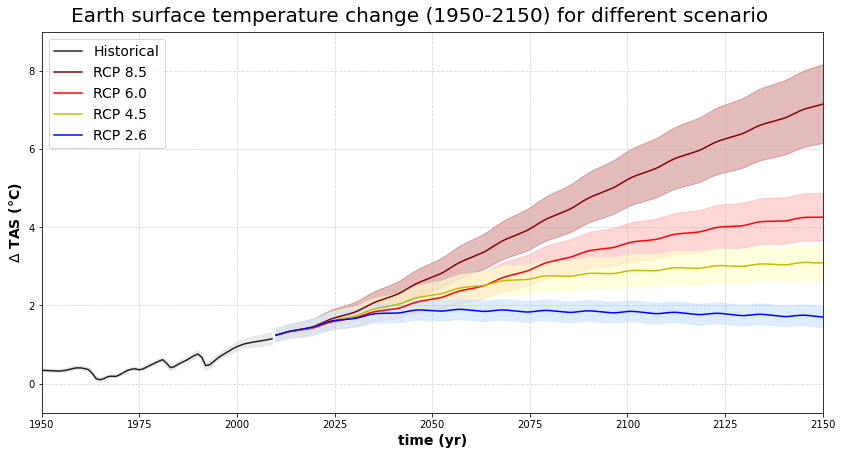

In [92]:
# Figure
fig, ax = plt.subplots(1,1, figsize=(14,7))

# Reconstruction using convolution method
t = np.arange(1750, 2010)
ax.plot(t, D_TAS_all[:-2].mean(axis=1), color="#222", ls='-', label="Historical")
ax.fill_between(t, D_TAS_all[:-2].mean(axis=1)+1*D_TAS_all[:-2].std(axis=1), 
                   D_TAS_all[:-2].mean(axis=1)-1*D_TAS_all[:-2].std(axis=1), 
                   color='#E0E0E0aa')


# RCP 8.5
yi = 260
t = np.arange(1750, 1750+D_TAS['85'].shape[0])
ax.plot(t[yi:], D_TAS['85'][yi:].mean(axis=1), color=color_dico['85'], ls='-', label="RCP 8.5")
ax.fill_between(t[yi:], D_TAS['85'][yi:].mean(axis=1)+1*D_TAS['85'][yi:].std(axis=1), 
                   D_TAS['85'][yi:].mean(axis=1)-1*D_TAS['85'][yi:].std(axis=1), 
                   color='#99000044')


# RCP 6.0
t = np.arange(1750, 1750+D_TAS['60'].shape[0])
ax.plot(t[yi:], D_TAS['60'][yi:].mean(axis=1), color=color_dico['60'], ls='-', label="RCP 6.0")
ax.fill_between(t[yi:], D_TAS['60'][yi:].mean(axis=1)+1*D_TAS['60'][yi:].std(axis=1), 
                   D_TAS['60'][yi:].mean(axis=1)-1*D_TAS['60'][yi:].std(axis=1), 
                   color='#FF999966')

# RCP 4.5
t = np.arange(1750, 1750+D_TAS['45'].shape[0])
ax.plot(t[yi:], D_TAS['45'][yi:].mean(axis=1), color=color_dico['45'], ls='-', label="RCP 4.5")
ax.fill_between(t[yi:], D_TAS['45'][yi:].mean(axis=1)+1*D_TAS['45'][yi:].std(axis=1), 
                   D_TAS['45'][yi:].mean(axis=1)-1*D_TAS['45'][yi:].std(axis=1), 
                   color='#FFFFCCaa')

# RCP 2.6
t = np.arange(1750, 1750+D_TAS['26'].shape[0])
ax.plot(t[yi:], D_TAS['26'][yi:].mean(axis=1), color=color_dico['26'], ls='-', label="RCP 2.6")
ax.fill_between(t[yi:], D_TAS['26'][yi:].mean(axis=1)+1*D_TAS['26'][yi:].std(axis=1), 
                   D_TAS['26'][yi:].mean(axis=1)-1*D_TAS['26'][yi:].std(axis=1), 
                   color='#CCE5FFaa')

    
ax.set_xlabel('time (yr)',          fontsize=14, fontweight="bold")
ax.set_ylabel(r'$\Delta$ TAS (°C)', fontsize=14, fontweight="bold")

ax.set_xlim([1950, 2150])
ax.set_ylim([-0.75, 9])
ax.grid("on", alpha=0.5, ls="--")

handles, labels = plt.gca().get_legend_handles_labels()
ax.legend(fontsize=14)
    
fig.suptitle("Earth surface temperature change (1950-2150) for different scenario", fontsize=20, fontweight="normal", y=0.93)

* _Discuss the results, focus on the difference between models as well as the difference
between projections._

<font color="blue">

Along this notebook, we already have discussed about the differences between models that can have multiple cause.
Nevertheless, this figure confirms that climate models agree between each other regarding the overall climate response to external forcings, even if the exact strength and speed of this response is not known.

- **At short/mid term** (< 2040) the scenario makes little difference and most of the uncertainty is due to the models.:

  -  _modelling choices_ (parameters) cause difference between models
 
  -  the simulated climate still have an _internal variability_. Indeed, climate variables exhibit natural fluctuations meaning that two simulations starting from a different state (but with the same climate in a statistical sense) will give different results. This leads to uncertainties that climate scientists try to quantify. In practive, several simulations of the same individual model are runs with different initialisation (intial state). *Tens* of simulations of *tens* model for *different* scenario $\rightarrow$ this is really really costly and a non-negligeable source of greenhouse gases emissions..

- **At long term** (>2050) the choosen scenario matters a lot !! 

</font>